# 1. Business Understanding

In this project I'm going to develop a pricing algorithm for houses in the northwest county based on a past collected data of house sales. The goal is to help homeowners save time on buying and/or selling houses.

This algorithm is predictive, meaning it will help stackeholders who want to buy or sell houses can use this algorithm to predcit house prices based on home renovations.

This algorithm will be able to tell us something about the relationship between attributes of houses and their prices. It other terms it will be inferential.


# Loading the data

In [70]:
# importing the necessary libraries for this project
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from  sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(21)

%matplotlib inline

In [71]:
# loading the dataset
df = pd.read_csv('./data/kc_house_data.csv', index_col='id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [73]:
original_shape = df.shape 
original_shape

(21597, 20)

# 2. Data Understanding
 - Given is a a King County House Sales dataset. Which contains house attributes as well  as their prices. This is suitable for this project as we willl be using these attributes to predict the house prices.
 - The dataset has a total of 21,597 rows and 21 columns. Meaning 21,597 houses were taken as a sample and 21 of their existing attributes recorded.
 - Based on the sample given some attributes will sure help show the relationship between them and house prices.
 - The data also has some irrelevant columns which will be dropped, since they might hinder in creating a good model.


# 3. Data Preparation

The prediction target for this analysis is the proce of houses, hence will separate X and y appropiately

In [74]:
X = df.drop('price', axis=1)
y = df['price']

In [75]:
# splitting the data into a train and test sets, prior beforming any preprocesssing steps
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [76]:
print(f"X_train is a dataframe with {X_train.shape[0]} records and {X_train.shape[1]} attributes")
print(f"y_train is a series with {y_train.shape[0]} values")
print()
print(f"X_test has {X_test.shape[0]} records")
print(f"y_test has {y_test.shape[0]} records")

X_train is a dataframe with 16197 records and 19 attributes
y_train is a series with 16197 values

X_test has 5400 records
y_test has 5400 records


## Data Cleaning

### Functions to help with data Cleaning

In [77]:
# function to concate a set with its target variable
def concater(X, y):
    result = pd.concat([y, X], axis = 1)
    return result

In [78]:
# function to split concated set with its target variable and convert to floors and waterfront to integers
def set_splitter(dataset):
    X = dataset.drop('price', axis=1)
    y = dataset.price
    
    return X, y

## Handling with duplicated values

In [79]:
# concating the training set
concated_train = concater(X_train, y_train)

In [80]:
concated_train.duplicated().any()

False

## Handling with duplicated Values

Checking for null values in the train set

In [81]:
# Concating X_train and y_train
concated_train.isna().sum()

price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1788
view               47
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2885
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Handling Mising Values

### Dealing with yr_renovated null values

In [82]:
# Checking for the values in thr yr_renovated column
concated_train['yr_renovated'].value_counts()

0.0       12750
2014.0       52
2003.0       24
2005.0       23
2000.0       23
          ...  
1959.0        1
1945.0        1
1944.0        1
1948.0        1
1953.0        1
Name: yr_renovated, Length: 65, dtype: int64

#### For yr_renovated I will use SimpleImputer to help deal with the null values

In [83]:
#  function for dealing with null values in a given set based on the yr_renovated column
def yr_renovated(concated_set):
    # creating a dataframe which contains the yr_renovated columns
    # NB: The houses without renavations have been filtered out
    year_renovated = concated_set[concated_set['yr_renovated'] != 0][['yr_renovated']]

    # using simpleImputer to deal with the null values in the yr_renovated column
    imput = SimpleImputer(missing_values=np.nan, strategy='median')
    imput.fit(year_renovated)
    new_year_renovated = imput.transform(year_renovated).flatten()
    year_renovated['yr_renovated'] = new_year_renovated

    condition = (
        concated_set.yr_renovated != 0 &
        concated_set.yr_renovated.isna()
    )

    # reassing the variables to the yr_renovated column strictly with columns whose values are not in the 0
    concated_set.loc[condition, 'yr_renovated'] = year_renovated

    return concated_set

In [84]:
# dealing with null values in the concated_train set
concated_train = yr_renovated(concated_train)
concated_train.isna().sum()

price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1788
view               47
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Dealing with null values in the view column

In [85]:
# checking for the unique values in the column and their occurence
concated_train.view.value_counts()

0.0    14585
2.0      718
3.0      356
4.0      246
1.0      245
Name: view, dtype: int64

In [86]:
#  function for dealing with null values in a given set based on the view column
def view(concated_set):
    # creating a dataframe which contains the view columns
    view = concated_set[['view']]

    # using simpleImputer to deal with the null values in the view column
    imput = SimpleImputer(missing_values=np.nan, strategy='median')
    imput.fit(view)
    new_view = imput.transform(view).flatten()
    view.view = new_view

    # condition = (concated_set.view.isna())

    # reassing the variables to the view column strictly with columns whose values are not in the 0
    concated_set.view = view

    return concated_set

In [87]:
concated_train = view(concated_train)
concated_train.isna().sum()

/tmp/ipykernel_6628/3432681625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view.view = new_view


price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1788
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Dealing with null values in the waterfront column

In [88]:
concated_train.waterfront.value_counts()

0.0    14297
1.0      112
Name: waterfront, dtype: int64

In [89]:
#  function for dealing with null values in a given set based on the waterfront column
def waterfront(concated_set):
    # creating a dataframe which contains the waterfront columns
    waterfront = concated_set[['waterfront']]

    # using simpleImputer to deal with the null values in the waterfront column
    imput = SimpleImputer(missing_values=np.nan, strategy='median')
    imput.fit(waterfront)
    new_waterfront = imput.transform(waterfront).flatten()
    waterfront.waterfront = new_waterfront


    # reassing the variables to the waterfront column strictly with columns whose values are not in the 0
    concated_set.waterfront = waterfront

    return concated_set

In [90]:
concated_train = waterfront(concated_train)
concated_train.isna().sum()

/tmp/ipykernel_6628/598743563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterfront.waterfront = new_waterfront


price            0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [91]:
print(f"The train set now has {concated_train.shape[0]} records")

The train set now has 16197 records


In [92]:
# Full function for the data cleaning
def data_cleaning(X, y):
    concated_set = concater(X, y)
    concated_set = yr_renovated(concated_set)
    concated_set = view(concated_set)
    concated_set = waterfront(concated_set)

    return concated_set

## Dealing with datatypes

In [93]:
concated_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 4139480190 to 1336800880
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16197 non-null  float64
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     16197 non-null  float64
 8   view           16197 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  object 
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   16197 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float

In [94]:
# since data is of a datatype object I will drop this column, so that it does not affect the modelling process.
# function for dropping the data column
def date(concated_set):
    concated_set = concated_train.drop('date', axis=1)
    return concated_set

concated_train = date(concated_train)
concated_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 4139480190 to 1336800880
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16197 non-null  float64
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   view           16197 non-null  float64
 8   condition      16197 non-null  int64  
 9   grade          16197 non-null  int64  
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  object 
 12  yr_built       16197 non-null  int64  
 13  yr_renovated   16197 non-null  float64
 14  zipcode        16197 non-null  int64  
 15  lat            16197 non-null  float64
 16  long           16197 non-null  float64
 17  sqft_living15  16197 non-null  int64

Invstigating the sqft_basement column

The sqft_basement has a string in some of its records this will hinder the data modelling process hence I will filter the records containing the '?' string out.

In [95]:
# The roecords containing ? could be that their sqft_basement is unknown
# Function to filter out the strings from the sqft_basement column
# The function will also change the column's columns data type to an int
def sqft_basement(concated_set):
    concated_set = concated_set[ (concated_set['sqft_basement'] != '?') ]
    concated_set['sqft_basement'] = pd.to_numeric(concated_set['sqft_basement'])
    return concated_set

concated_train = sqft_basement(concated_train)
concated_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15850 entries, 4139480190 to 1336800880
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15850 non-null  float64
 1   bedrooms       15850 non-null  int64  
 2   bathrooms      15850 non-null  float64
 3   sqft_living    15850 non-null  int64  
 4   sqft_lot       15850 non-null  int64  
 5   floors         15850 non-null  float64
 6   waterfront     15850 non-null  float64
 7   view           15850 non-null  float64
 8   condition      15850 non-null  int64  
 9   grade          15850 non-null  int64  
 10  sqft_above     15850 non-null  int64  
 11  sqft_basement  15850 non-null  float64
 12  yr_built       15850 non-null  int64  
 13  yr_renovated   15850 non-null  float64
 14  zipcode        15850 non-null  int64  
 15  lat            15850 non-null  float64
 16  long           15850 non-null  float64
 17  sqft_living15  15850 non-null  int64

/tmp/ipykernel_6628/1502401251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concated_set['sqft_basement'] = pd.to_numeric(concated_set['sqft_basement'])


## A histogram showing the distribution of the target variable (house price)

Text(0.5, 1.0, 'Distribution of house prices')

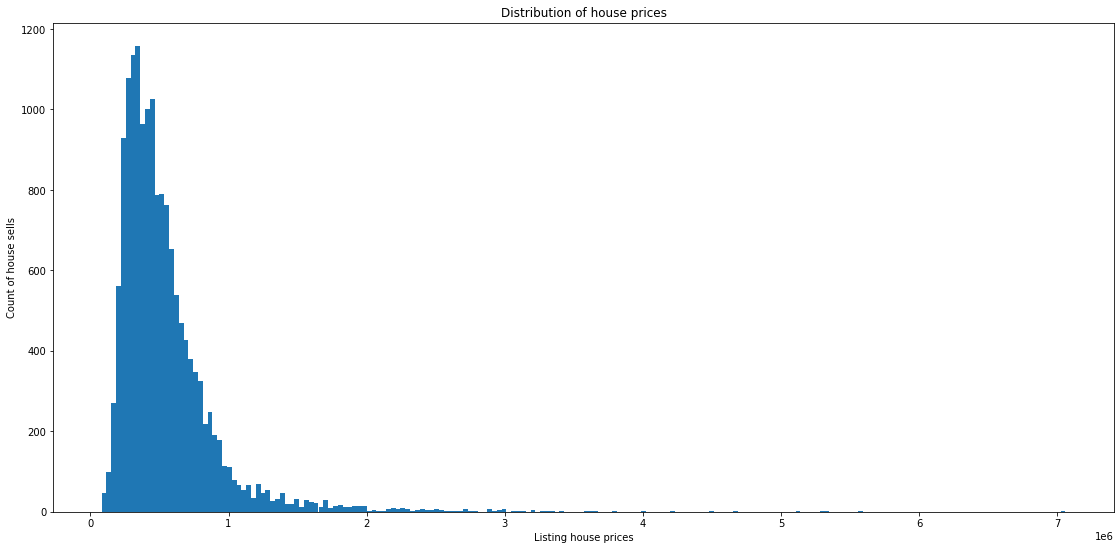

In [96]:
fig, ax = plt.subplots(figsize=(19,9))

ax.hist(concated_train.price, bins=200)


ax.set_xlabel('Listing house prices')
ax.set_ylabel('Count of house sells')
ax.set_title('Distribution of house prices')

In [97]:
# function to check for outliers
def outliers(column):
    outliers = []
    quantile1, quantile2 = column.quantile([0.01 ,0.99])

    for i in column:
        if (i < quantile1) | (i > quantile2):
            outliers.append(i)

    return outliers


In [98]:
concated_train_ouliers = outliers(concated_train.price)
len(concated_train_ouliers)

317

### From above we have 317 outlies in the train dataset hence will remove them so as to not affect the analysis

In [99]:
# function to remove outliers and returns the new updated dataframe
def outliers_remover(concated_set, outliers):
    for i in range(len(outliers)):
        row_index = concated_set[ concated_set.price == i ].index
        concated_set = concated_set.drop(row_index)
    return concated_set

In [100]:
print(f"Number of train set records before removing outliers {concated_train.shape[0]}")
print()
concated_train = outliers_remover(concated_train, concated_train_ouliers)
print(f"Number of train set records after removing outliers {concated_train.shape[0]}")

Number of train set records before removing outliers 15850

Number of train set records after removing outliers 15850


### A histogram showing the distribution of the target variable (house price) after removing the outliers

Text(0.5, 1.0, 'Distribution of house prices')

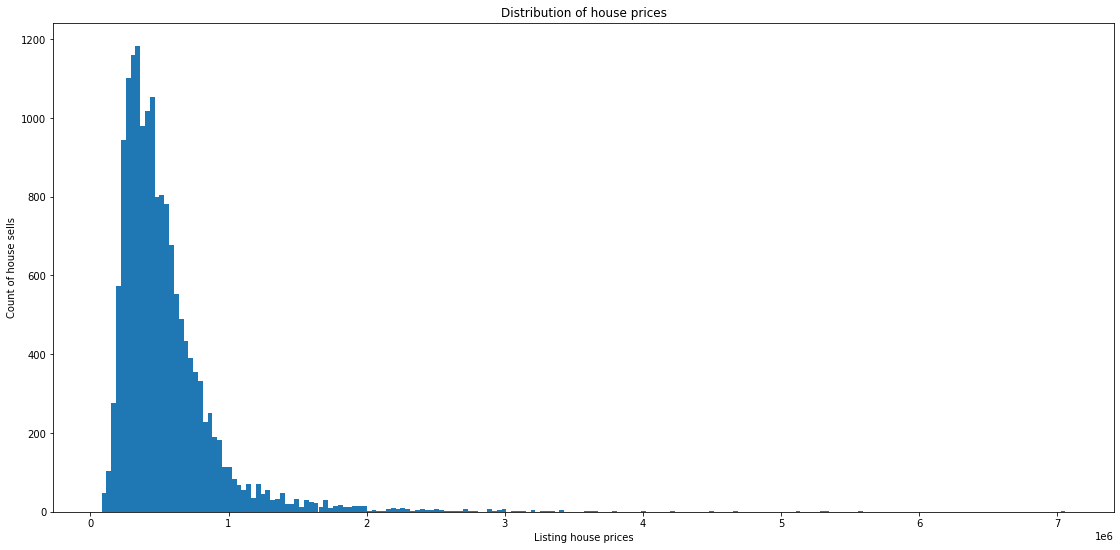

In [101]:
fig, ax = plt.subplots(figsize=(19,9))

ax.hist(y_train, bins=200)

ax.set_xlabel('Listing house prices')
ax.set_ylabel('Count of house sells')
ax.set_title('Distribution of house prices')

In [102]:
# full function for data preparation
def data_preparation(X,y):
    concated_set  = data_cleaning(X,y) # data cleaning function

    # dealing with the data types
    concated_set = date(concated_set)
    concated_set = sqft_basement(concated_set)

    # dealing with outliers
    outliers = outliers(concated_set.price) # identifying outliers
    concated_set = outliers_remover(concated_set, outliers) # removing outliers


    return concated_set

# 4. Modeling

In [105]:
# splitting the data into X and y
X_train, y_train = set_splitter(concated_train)

### Building a heat map to show correlation between all train set attributes and their target which is the house price

<AxesSubplot:>

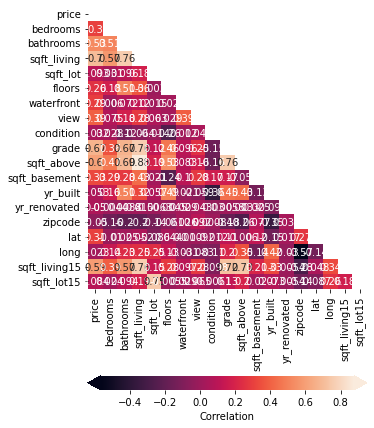

In [109]:
heatmap_x = concated_train

train_test_corr = heatmap_x.corr()
fig, ax = plt.subplots(figsize=(5, 8))

sns.heatmap(
    # Specifies the data to be plotted
    data = train_test_corr,
    # The mask means we only show half the values, instead of showing duplicates.
    mask= np.triu(np.ones_like(train_test_corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizing colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

A scatterplot of the most_correlated_feature vs house prices

This model is not readable hence I will use REFCV function to select the models of best fit

In [112]:
# Intializing a splitter
splitter = ShuffleSplit(
    n_splits=3,
    test_size=0.25,
    random_state=20
) # perfoms a 5 seperate train-test splits 

In [113]:
# using REFCV
X_train_REFECV = StandardScaler().fit_transform(X_train)

model_for_REFECV = LinearRegression()

# Intitate and fit the selector
selector = RFECV(model_for_REFECV, cv=splitter)
selector.fit(X_train_REFECV, y_train)

# Print the results
print("Was the column selected")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
yr_built: True
yr_renovated: True
zipcode: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


The algorithim selects all the attributes hence I will use dive more to other alternatives to find the best combinators

In [118]:
len(X_train.columns)

18

In [115]:
# investigating for multicolinearity
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2212.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:46:29   Log-Likelihood:            -2.1598e+05
No. Observations:               15850   AIC:                         4.320e+05
Df Residuals:                   15832   BIC:                         4.321e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.909e+06   3.41e+06      2.026      0.043    2.26e+05    1.36e+07
bedrooms        -3.5e+04   2203.272    -15.887      0.000   -3.93e+04   -3.07e+04
bathrooms      4.377e+04   3761.564     11.635      0.000    3.64e+04    5.11e+04
sqft_living     108.1657      2.645     40.899      0.000     102.982     113.350
sqft_lot          0.1667      0.062      2.668      0.008       0.044       0.289
floors         6860.7889   4215.708      1.627      0.104   -1402.479    1.51e+04
waterfront     7.059e+05   2.09e+04     33.701      0.000    6.65e+05    7.47e+05
view           4.935e+04   2478.958     19.907      0.000    4.45e+04    5.42e+04
condition      2.453e+04   2705.736      9.065      0.000    1.92e+04    2.98e+04
grade          9.842e+04   2505.028     39.291      0.000    9.35e+04    1.03e+05
sqft_above       68.2573      2.617     26.083      0.000      63.128      73.387
sqft_basement    39.8985      3.090     12.910      0.000      33.841      45.956
yr_built      -2742.7589     80.993    -33.864      0.000   -2901.514   -2584.003
yr_renovated      4.6032      1.968      2.339      0.019       0.746       8.460
zipcode        -587.9456     38.399    -15.311      0.000    -663.213    -512.679
lat            5.988e+05   1.25e+04     47.974      0.000    5.74e+05    6.23e+05
long          -2.208e+05   1.55e+04    -14.280      0.000   -2.51e+05    -1.9e+05
sqft_living15    21.3026      4.011      5.310      0.000      13.440      29.165
sqft_lot15       -0.4092      0.088     -4.669      0.000      -0.581      -0.237
==============================================================================
Omnibus:                    12056.822   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           741090.127
Skew:                           3.120   Prob(JB):                         0.00
Kurtosis:                      35.912   Cond. No.                     4.71e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.22e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Again we are not getting clear result hence I will use a brute force algorithm to find the best combinations to get the best results

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15850 entries, 4139480190 to 1336800880
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15850 non-null  int64  
 1   bathrooms      15850 non-null  float64
 2   sqft_living    15850 non-null  int64  
 3   sqft_lot       15850 non-null  int64  
 4   floors         15850 non-null  float64
 5   waterfront     15850 non-null  float64
 6   view           15850 non-null  float64
 7   condition      15850 non-null  int64  
 8   grade          15850 non-null  int64  
 9   sqft_above     15850 non-null  int64  
 10  sqft_basement  15850 non-null  float64
 11  yr_built       15850 non-null  int64  
 12  yr_renovated   15850 non-null  float64
 13  zipcode        15850 non-null  int64  
 14  lat            15850 non-null  float64
 15  long           15850 non-null  float64
 16  sqft_living15  15850 non-null  int64  
 17  sqft_lot15     15850 non-null  int64

In [106]:
# Function for getting coeeficients in a cross_valiate
def coeeficients(score):
    for model in score['estimator']:
        print(model.coef_)

## Building models to find the best model overall

### First Model 

The first model will contain all the attributes

In [134]:
first_model = LinearRegression()

first_score = cross_validate(
    estimator=first_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    return_estimator=True,
    cv=splitter
)

print(f"Train Score:            {first_score['train_score'].mean()}")
print(f"Validation Score:       {first_score['test_score'].mean()}")
print(f"Difference in scores:   {  (first_score['train_score'].mean()) - (first_score['test_score'].mean())}")


Train Score:            0.7050431153778316
Validation Score:       0.6986506510755408
Difference in scores:   0.00639246430229079


The model had a good R-2 and the difference between the models is low, hence it does a good job in predicting the house prices

### Second Model 

The second model will be built using the PolynomialFeature

In [131]:
# Building a less complex polynomial feature 
poly_2 = PolynomialFeatures(2)
X_train_poly2 = poly_2.fit_transform(X_train)

In [135]:
second_model = LinearRegression()

second_score = cross_validate(
    estimator=second_model,
    X=X_train_poly2,
    y=y_train,
    return_train_score=True,
    return_estimator=True,
    cv=splitter
)
print(f"Train Score:            {second_score['train_score'].mean()}")
print(f"Validation Score:       {second_score['test_score'].mean()}")
print(f"Difference in scores:   {  (second_score['train_score'].mean()) - (second_score['test_score'].mean())}")

Train Score:            0.8263321223716037
Validation Score:       0.8185204804778272
Difference in scores:   0.0078116418937764776


Both the score are higher than compared to the first model whose R-2 was a bit lower, also the diffence between the score is low hence this model does a better in prediction

### Third Model 

In [137]:
# Building a more complex polynomial feature 
poly_3 = PolynomialFeatures(3)
X_train_poly3 = poly_3.fit_transform(X_train)

In [138]:
third_model = LinearRegression()

third_score = cross_validate(
    estimator=third_model,
    X=X_train_poly2,
    y=y_train,
    return_train_score=True,
    return_estimator=True,
    cv=splitter
)
print(f"Train Score:            {third_score['train_score'].mean()}")
print(f"Validation Score:       {third_score['test_score'].mean()}")
print(f"Difference in scores:   {  (third_score['train_score'].mean()) - (third_score['test_score'].mean())}")

Train Score:            0.8544517995757936
Validation Score:       -2.1368246789611636
Difference in scores:   2.991276478536957


This model performed bad, hence will stick with the second model as the best model

In [139]:
best_model = second_model

## Using a Brute force algorithm to determine the best combination of models for the best prediction